In [3]:
import import_ipynb
import sys
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from dataset_Loader.data_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [4]:
# Save all the Print Statements in a Log file.
old_stdout = sys.stdout
log_file = open("summary.log","w")
sys.stdout = log_file

In [7]:
# Load MNIST Data
print('\nLoading MNIST Data...')
data = MNIST('./dataset_Loader/dataset/')

In [8]:
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

In [9]:
print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

In [10]:
#Features
X = train_img

#Labels
y = train_labels

In [11]:
# Prepare Classifier Training and Testing Data
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)

In [12]:
# Pickle the Classifier for Future Use
print('\nSVM Classifier with gamma = 0.1; Kernel = polynomial')
print('\nPickling the Classifier for Future Use...')
clf = svm.SVC(gamma=0.1, kernel='poly')
clf.fit(X_train,y_train)

SVC(gamma=0.1, kernel='poly')

In [13]:
with open('MNIST_SVM.pickle','wb') as f:
	pickle.dump(clf, f)

pickle_in = open('MNIST_SVM.pickle','rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test,y_test)


In [14]:
print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

In [15]:
print('\nSVM Trained Classifier Accuracy: ',acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)

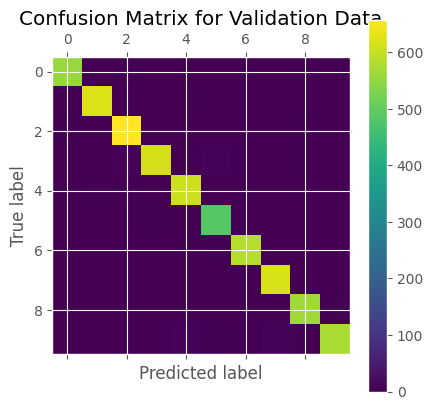

In [16]:
# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [17]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)


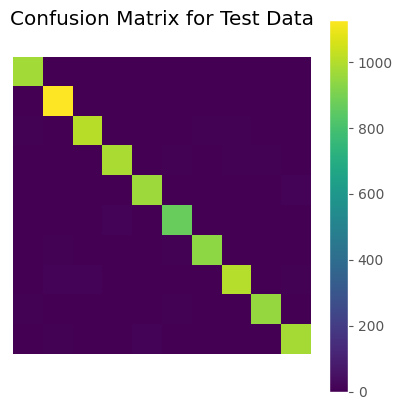

In [18]:
# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()


In [19]:
sys.stdout = old_stdout
log_file.close()

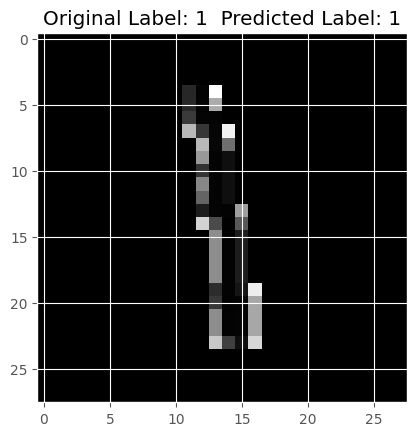

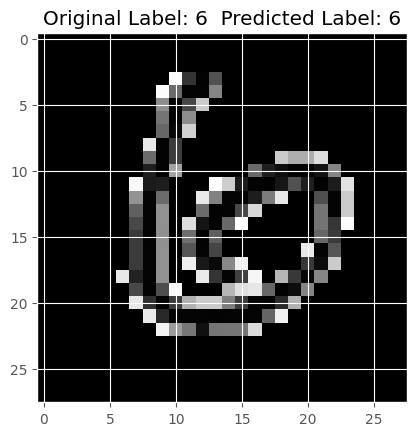

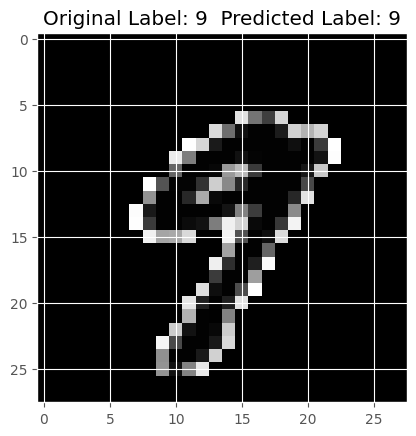

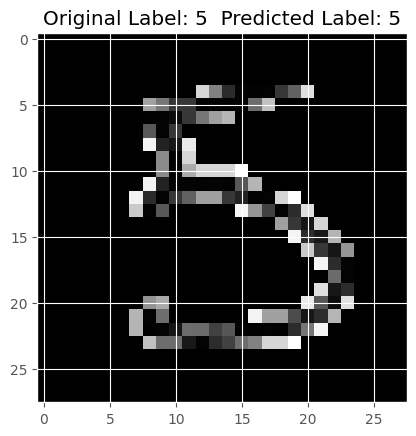

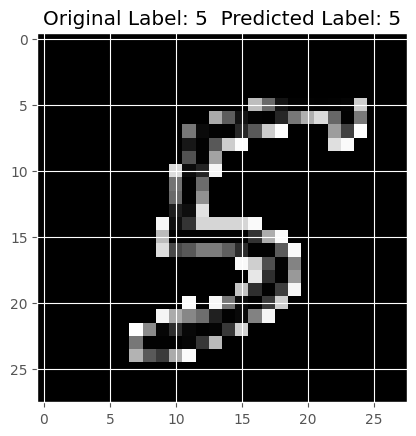

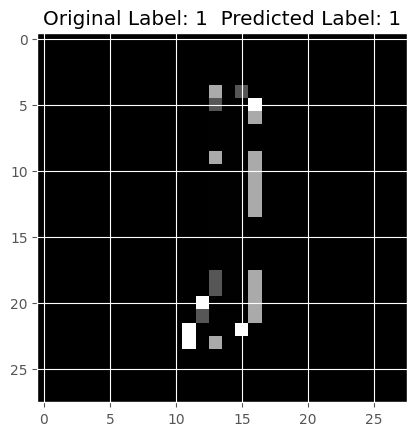

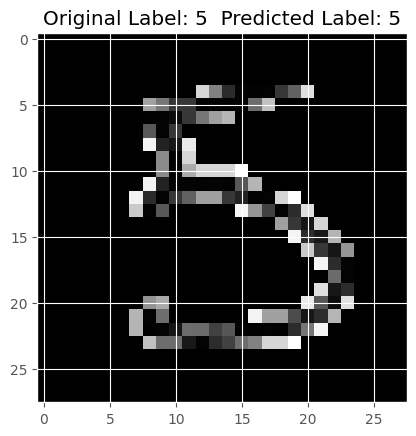

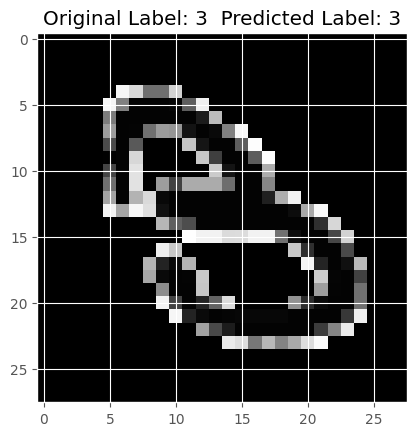

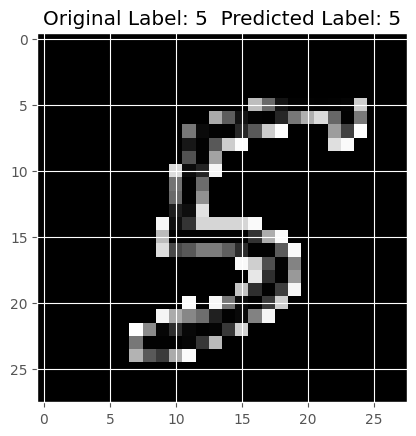

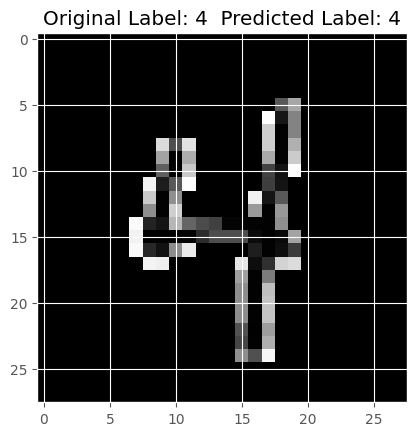

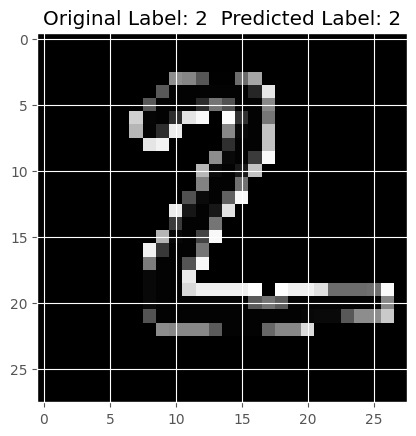

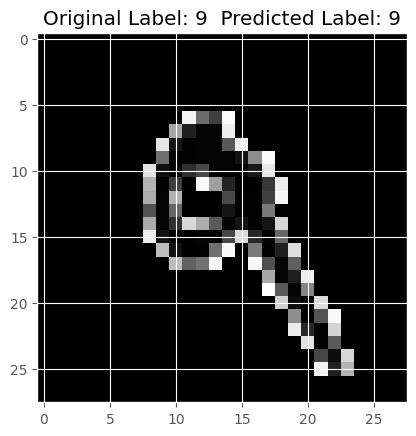

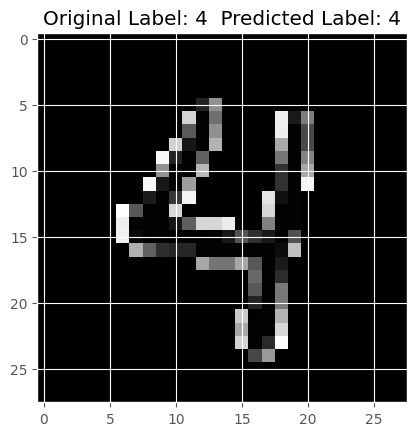

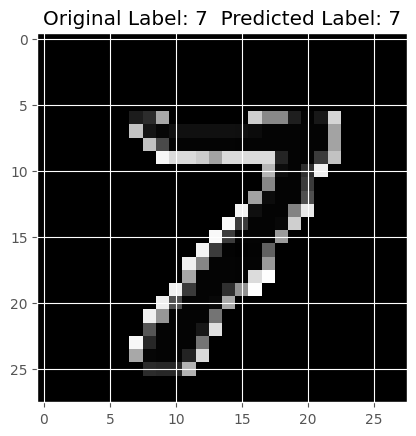

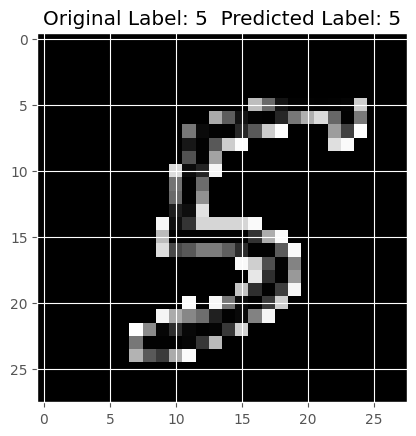

In [20]:
# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,40,15)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()